В задаче необходимо научиться определять, утонет ли посетитель Титаника или нет по наличию (не всегда хорошо заполненных) признаков.

train.csv — набор данных на основании которого будет строиться модель (обучающая выборка)<br>
test.csv — набор данных для проверки модели

Для каждого пассажира известны следующие признаки

PassengerId — идентификатор пассажира<br>
Survival — поле в котором указано спасся человек (1) или нет (0)<br>
Pclass — содержит социально-экономический статус (высокий, средний, низкий)<br>
Name — имя пассажира<br>
Sex — пол пассажира<br>
Age — возраст<br>
SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)<br>
Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)<br>
Ticket — номер билета<br>
Fare — цена билета<br>
Cabin — каюта<br>
Embarked — порт посадки (C — Cherbourg, Q — Queenstown, S — Southampton)<br>

Для начала с помощью Pandas посмотрим на данные

In [14]:
y_true = [1,1,0,1]
y_pred = [0.9, 0.4, 0.2, 0.1]
logloss = 0
from math import log
for i in range(4):
    logloss += y_true[i]*log(y_pred[i]) + (1 - y_true[i])*log(1 - y_pred[i])
    
-logloss/4

0.8868449729600592

In [15]:
from sklearn.metrics import log_loss
log_loss(y_true, y_pred)

0.8868449729600592

In [6]:
import pandas as pd
import os

titanic_data = '/data/share/text4/'

train = pd.read_csv(os.path.join(titanic_data,'train.csv'))
test = pd.read_csv(os.path.join(titanic_data,'test.csv'))

In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Быстрый старт. Попробуем взять быка за рога

Помним, что модели машинного обучения принимают на вход только числа. Удалим всё, что не число.

In [17]:
y = train['Survived']

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [34]:
train_small.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [71]:
train_small = train.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived'])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_small, y, test_size=0.2)

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [41]:
predict

array([[0.41746116, 0.58253884],
       [0.69526598, 0.30473402],
       [0.3619589 , 0.6380411 ],
       [0.75744848, 0.24255152],
       [0.74914465, 0.25085535],
       [0.70010801, 0.29989199],
       [0.60882384, 0.39117616],
       [0.73191704, 0.26808296],
       [0.74889332, 0.25110668],
       [0.35902935, 0.64097065],
       [0.39998046, 0.60001954],
       [0.75329234, 0.24670766],
       [0.75083405, 0.24916595],
       [0.4242836 , 0.5757164 ],
       [0.75252829, 0.24747171],
       [0.02898858, 0.97101142],
       [0.39809577, 0.60190423],
       [0.39504316, 0.60495684],
       [0.26954392, 0.73045608],
       [0.37245738, 0.62754262],
       [0.65523577, 0.34476423],
       [0.75920581, 0.24079419],
       [0.62394625, 0.37605375],
       [0.60726983, 0.39273017],
       [0.7432893 , 0.2567107 ],
       [0.75178266, 0.24821734],
       [0.75056315, 0.24943685],
       [0.10796105, 0.89203895],
       [0.61221727, 0.38778273],
       [0.02289707, 0.97710293],
       [0.

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.6927374301675978

In [76]:
train_small.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [75]:
model.coef_

array([[ 2.42584491e-04, -7.55911569e-01, -3.70052172e-02,
        -2.31158952e-01,  2.57523344e-01,  7.92641800e-03]])

0.7061141304347825


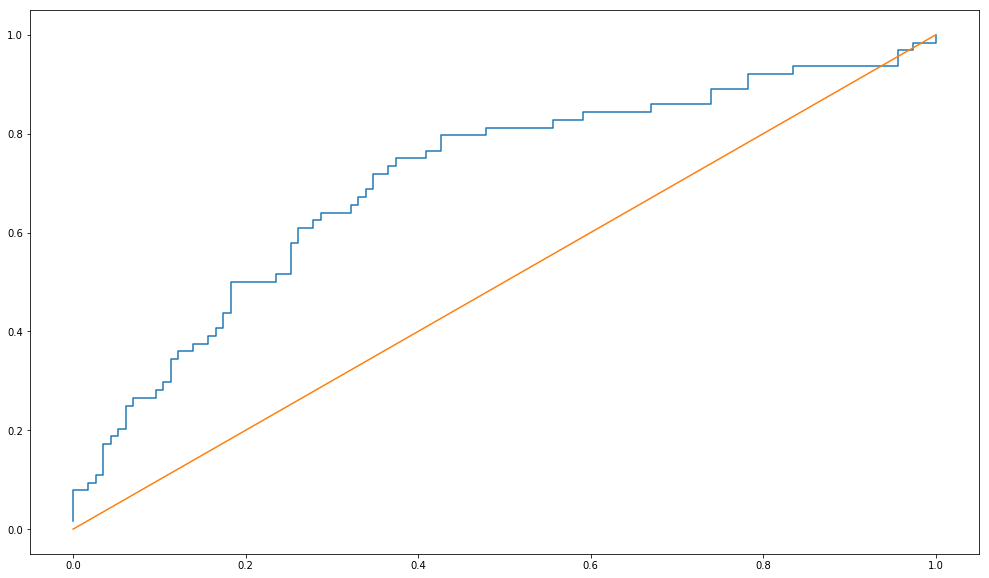

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
from random import random
from matplotlib import pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])

plt.figure(figsize=(17,10))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
print(roc_auc_score(y_test, predict[:,1]))

Начнём с самого простого - baseline-модели. Например, предположим, что спаслись богатеи из 1 и 2 класса


In [50]:
predict = []
for i in range(len(train)):
    predict = train['Sex'].apply(lambda x: int(x == 'female'))
    #predict = train['Pclass'].apply(lambda x: int(x < 3))
#predict

In [52]:
accuracy_score(y, predict)

0.7867564534231201

0.7668727830505226


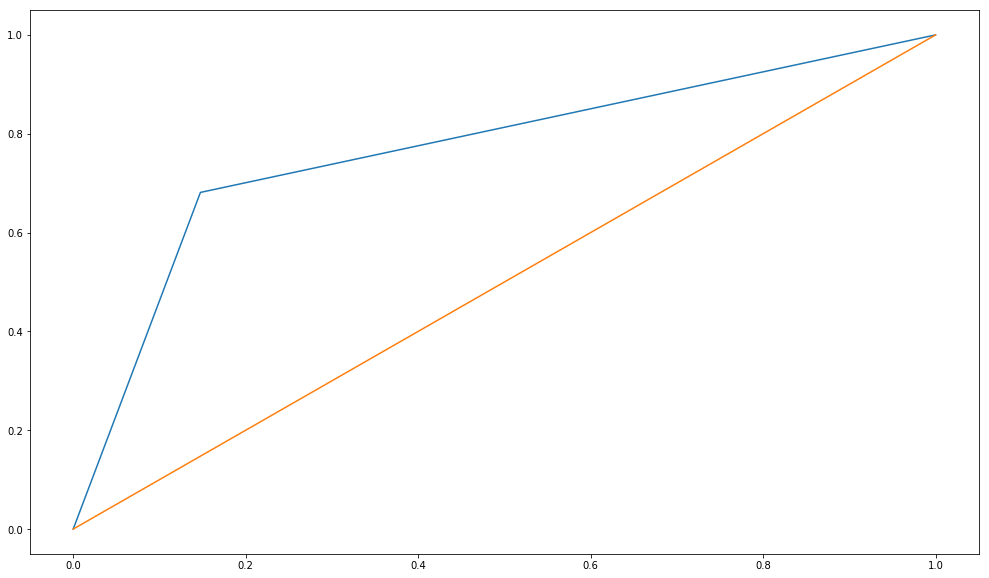

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
fpr, tpr, thresholds = roc_curve(y, predict)

plt.figure(figsize=(17,10))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
print(roc_auc_score(y, predict))

Посмотрим теперь, все ли хорошо с данными, есть ли в них пропуски. Очень полезно для этого использовать info() и describe()

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
train.describe()

In [ ]:
train.groupby('Sex').median()

Видим, что номера кают заполнены очень плохо, возраст можно попытаться как-то восстановить: есть 2 варианта - заполнить медианным значением или же натренировать классификатор по другим признакам. Поступим простым путем - заполним медианным значением

In [58]:
train.Age[train.Age.isnull()]

Series([], Name: Age, dtype: float64)

In [56]:
train[train['Sex'] == 'female'].Age.median()

27.0

In [57]:
train.Age = train.Age.fillna(train.Age.median())

Остался еще порт посадки - там всего 2 значения не заполнены. Давайте присвоим эти пассажирам порт в котором село больше всего людей:

In [60]:
MaxPortEmbarked = train.groupby('Embarked').count()['PassengerId']
MaxPortEmbarked

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [62]:
MaxPassEmbarked = train.groupby('Embarked').count()['PassengerId']
train.Embarked[train.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]

/opt/anaconda/envs/bd9/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
train.Embarked[train.Embarked.isnull()]

Series([], Name: Embarked, dtype: object)

Теперь посмотрим на оставшиеся данные. Важно понимать, что ненужные признаки нужно отбрасывать - т.к. они добавляют шум. <br>
У нас остались: Имя (из него можно попробовать вытащить пол - упражнение на дом), Номер билета (тут ради интереса можно проверить на какую-нибудь четность, например), Номер каюты (тоже в нумерологию не верим)    

In [83]:
train_cat = train_cat.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [85]:
train_cat = train_cat.drop(['Sex_female'], axis=1)

Теперь посмотрим на то, что осталось

Что делать с категориальными переменным? Их нужно закодировать

In [81]:
train_cat = pd.get_dummies(train, columns=['Sex', 'Embarked'])

In [86]:
train_cat.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [99]:
train_cat.corr()['Pclass']

Survived     -0.338481
Pclass        1.000000
Age          -0.339898
SibSp         0.083081
Parch         0.018443
Fare         -0.549500
Sex_male      0.131900
Embarked_C   -0.243292
Embarked_Q    0.221009
Embarked_S    0.074053
Name: Pclass, dtype: float64

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_cat.drop(columns=['Survived']), train_cat['Survived'])
predict = model.predict_proba(train_cat.drop(columns=['Survived']))

In [90]:
accuracy_score(y, predict)

0.8024691358024691

0.8572284536477807


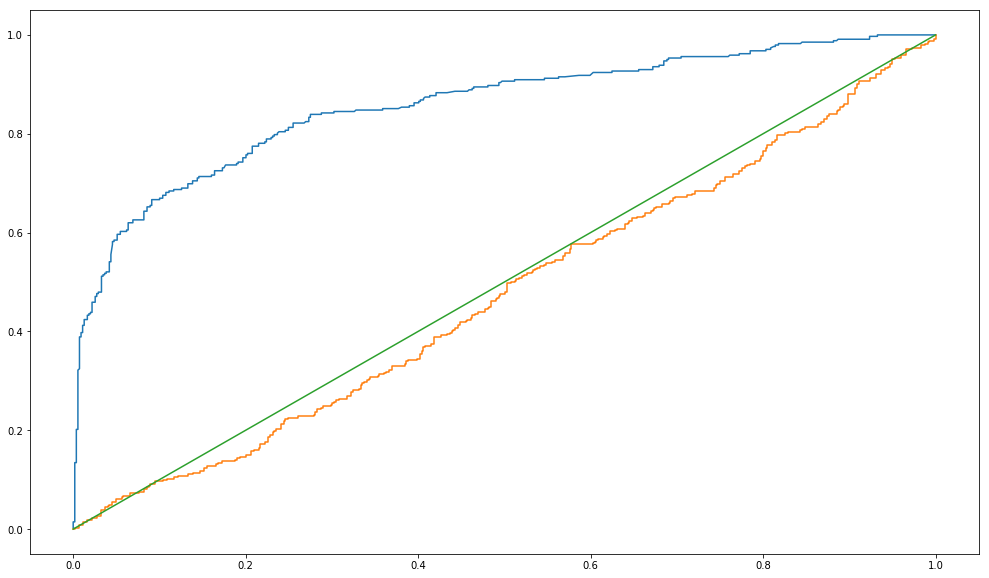

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
from random import random
fpr, tpr, thresholds = roc_curve(train_cat['Survived'], predict[:,1])

plt.figure(figsize=(17,10))
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(train_cat['Survived'], [random() for _ in range(len(train_cat))])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
print(roc_auc_score(train_cat['Survived'], predict[:,1]))

Обучались и проверяли на одном и том же. Исправим это.

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_cat.drop(columns=['Survived']), train_cat['Survived'],
                                                    test_size = 0.2)

In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [98]:
accuracy_score(y_test, predict)

0.7653631284916201

0.8750649013499482


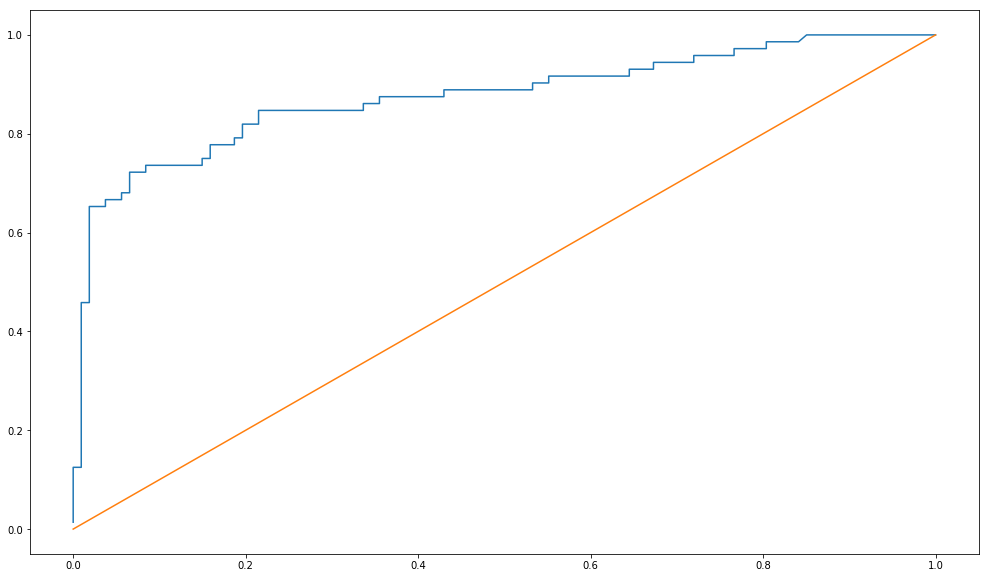

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])

plt.figure(figsize=(17,10))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
print(roc_auc_score(y_test, predict[:,1]))

А теперь кросс-валидацию попробуем

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
cross_val_score(model, X_train, y_train, cv=50, scoring =  make_scorer(accuracy_score))

array([0.86666667, 0.73333333, 0.73333333, 0.86666667, 0.8       ,
       0.8       , 0.93333333, 0.86666667, 0.93333333, 0.93333333,
       0.8       , 0.93333333, 0.86666667, 0.8       , 0.8       ,
       0.8       , 0.73333333, 0.66666667, 0.8       , 0.8       ,
       0.6       , 0.8       , 0.46666667, 0.73333333, 0.73333333,
       0.73333333, 0.86666667, 0.71428571, 0.78571429, 1.        ,
       0.78571429, 0.85714286, 0.71428571, 0.85714286, 1.        ,
       0.69230769, 0.76923077, 0.84615385, 0.69230769, 0.61538462,
       0.76923077, 0.69230769, 0.76923077, 0.92307692, 1.        ,
       0.69230769, 0.92307692, 0.76923077, 0.84615385, 0.84615385])

In [ ]:
X_train.head()

Проверим счастливого пассажира 666

In [ ]:
passenger_666 = make_features(train[train['PassengerId'] == 666])
passenger_666['Embarked_C'] = 0
passenger_666['Embarked_Q'] = 0
passenger_666 = passenger_666[['Survived','Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]
passenger_666.iloc[0,1:]

In [ ]:
def my_logreg(feat, coef, q):
    res = 0
    mult = list(zip(feat, coef))
    for el in mult:
        res+=el[0]*el[1]
    res+=q
    from math import exp
    
    return 1/(1+exp(-res))

In [ ]:
model.coef_

In [ ]:
passenger_666.iloc[0,1:].values

In [ ]:
my_logreg(passenger_666.iloc[0,1:].values, model.coef_[0], model.intercept_)

In [ ]:
model.predict_proba([passenger_666.iloc[0,1:].values])

Теперь, тоже самое нам нужно сделать с test.csv - удалить те же столбцы и сделать те же преобразования. На практике лучше сразу писать для этого отдельную функцию.
Потом попробуем сгенерировать сабмит для Kaggle

In [3]:
def make_features(features):
    features.Age[features.Age.isnull()] = features.Age.median()
    features.Fare[features.Fare.isnull()] = features.Fare.median() #заполняем пустые значения средней ценой билета
    features = pd.get_dummies(features, columns=['Sex', 'Embarked'])
    features = features.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)
    return features

In [ ]:
test.info()

In [ ]:
from sklearn.model_selection import train_test_split

In [7]:
train_final = make_features(train)
test_final = make_features(test)
train_final.drop(columns=['Sex_female'], inplace = True)
test_final.drop(columns=['Sex_female'], inplace = True)
test_final.head()

/opt/anaconda/envs/bd9/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda/envs/bd9/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0
3,3,27.0,0,0,8.6625,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,1


In [11]:
target_col = 'Survived'
features = list(train_final.columns)
features.remove(target_col)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_final[features], train_final[target_col])
predict = model.predict(test_final)

In [17]:
submit = pd.DataFrame()
submit['PassengerId'] = test['PassengerId'] 
submit['Prediction'] = predict
submit.to_csv('pred.csv', index=False)

Ещё пара идей

Можно предположить, что чем выше социальный статус, тем больше вероятность спасения. Давайте посмотрим, действительно ли это так. Для этого построим сводную. 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

train.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar')

Теперь посмотрим, как влияет кол-во родственников на целевую переменную. Для этого построим также сводные:

In [ ]:
fig, axes = plt.subplots(ncols=2)
train.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
train.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

Все, 80% работы мы сделали: теперь мы имеем матрицу обьект-признак, которую можно "скармливать" на вход различным алгоритмам машинного обучения<br>

Просто пример кода, использующего OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

x1 = ['Bangalore','Bangalore','Paris','New York']
y1 = [0.1,0.2,0.3,0.9]

x2 = ['Bangalore','New York']
y2 = [0.1,0.9]


train = pd.DataFrame(np.asarray([x1,y1]).T, columns=['x','y'])
test = pd.DataFrame(np.asarray([x2,y2]).T, columns=['x','y'])
# train = pd.concat([train['x'],pd.get_dummies(train['y'])],axis=1)
# train.head(6)
# test = pd.concat([test['x'],pd.get_dummies(test['y'])],axis=1)
# test.head(6)

enc_train = OneHotEncoder(dtype=np.int32)
y11 = enc_train.fit_transform(train['x'].values.reshape(-1,1)).toarray()
enc_train.get_feature_names()

enc_test = OneHotEncoder(dtype=np.int32)
y11 = enc_test.fit_transform(test['x'].values.reshape(-1,1)).toarray()
enc_test.get_feature_names()

y21 = enc_train.transform(test['x'].values.reshape(-1,1)).toarray()
y21
y21 = enc_test.transform(test['x'].values.reshape(-1,1)).toarray()
y21